#### Importing the necessary libraries

In [53]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np


In [54]:
# Loading the dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [55]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )


In [56]:
X_train.shape

(50000, 32, 32, 3)

In [57]:
y_train.shape

(50000, 1)

In [58]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

- y train is a 2D array we dont want any 2D array so we changing it to 1D

In [59]:
y_train = y_train.reshape(-1,)

In [60]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [61]:
X_test.shape

(10000, 32, 32, 3)

In [62]:
y_test.shape

(10000, 1)

In [63]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [64]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

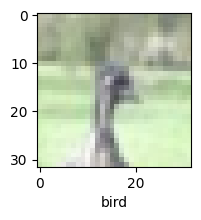

In [65]:
plot_sample(X_train, y_train, 48)

- Normalizing the values 

In [66]:
X_train = X_train/255 
X_test = X_test/255

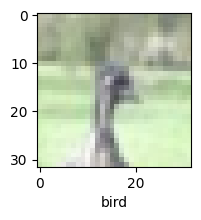

In [67]:
plot_sample(X_train, y_train, 48)

In [68]:
datagen.fit(X_train)


In [69]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

#### CNN Architecture

In [71]:
model = Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output and add Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout for regularization
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [72]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

#### Training the model

In [73]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=50, 
                    validation_data=(X_test, y_test))


Epoch 1/50
782/782 [==============================] - 52s 65ms/step - loss: 2.0185 - accuracy: 0.2894 - val_loss: 1.6534 - val_accuracy: 0.3993
Epoch 2/50
782/782 [==============================] - 56s 72ms/step - loss: 1.6338 - accuracy: 0.4060 - val_loss: 1.4543 - val_accuracy: 0.4807
Epoch 3/50
782/782 [==============================] - 59s 76ms/step - loss: 1.4868 - accuracy: 0.4697 - val_loss: 1.3841 - val_accuracy: 0.5157
Epoch 4/50
782/782 [==============================] - 59s 75ms/step - loss: 1.4015 - accuracy: 0.5010 - val_loss: 1.3326 - val_accuracy: 0.5560
Epoch 5/50
782/782 [==============================] - 59s 75ms/step - loss: 1.3299 - accuracy: 0.5353 - val_loss: 1.2648 - val_accuracy: 0.5596
Epoch 6/50
782/782 [==============================] - 59s 75ms/step - loss: 1.2823 - accuracy: 0.5553 - val_loss: 1.1450 - val_accuracy: 0.6054
Epoch 7/50
782/782 [==============================] - 59s 76ms/step - loss: 1.2420 - accuracy: 0.5708 - val_loss: 1.1132 - val_accuracy:

#### Evaluation

In [75]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.7862 - accuracy: 0.7442


[0.7862388491630554, 0.7441999912261963]

#### Accuracy: 74%

In [76]:
y_predictions = model.predict(X_test)

313/313 [==============================] - 4s 12ms/step


In [77]:
y_predictions[9]

array([9.1977046e-05, 9.5887953e-01, 1.8927012e-05, 2.0719786e-05,
       1.0311756e-07, 1.8528611e-06, 5.0703802e-05, 2.7370459e-06,
       2.7290260e-04, 4.0660508e-02], dtype=float32)

In [78]:
y_predictions = [np.argmax(arr) for arr in y_predictions]

In [79]:
y_predictions[9]

1

In [80]:
y_test = y_test.reshape(-1,)

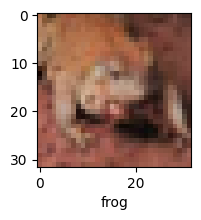

In [81]:
plot_sample(X_test, y_test,5)

#### Thanks